## Задание 2

<i>Написать скрипт/программу для вычисления вероятности для случая n кубиков и суммы равной s. n и s подаются на вход. Объяснить логику работы скрипта.</i>

In [1]:
import numpy as np
import itertools
from itertools import combinations

n = round(int(input()))  # количество кубиков
if n < 1:
    print('Введите положительное число')
else:
    # генерируем список из возможных 6-ти исходов кубика
    cube = [i for i in range(1, 7)]
    options = len(cube)**n  # количество возможных исходов
    max_sum = len(cube) * n  # максимальная сумма
    min_sum = n  # минимальная сумма

    s = int(input())  # искомая сумма

    if s < min_sum or s > max_sum:
        print(
            f'Сумма для {n} кубиков не может быть меньше {min_sum} и больше {max_sum}')
    else:
        list_dice = []
        # формируем список из значений всех кубиков
        for i in range(n):
            list_dice.append(cube)

        # список всех комбинаций
        comb_tup = list(itertools.product(*list_dice))

        counter = 0  # счетчик

        # перебираю сумму всех возможных комбинаций
        for i in range(len(comb_tup)):
            # если сумма комбинации = искомому значению, увеличиваю значение счетчика на 1
            if np.asarray(comb_tup[i]).sum() == s:
                counter += 1
        print(
            f'Вероятность, что при {n} кубиках сумма равна {s}: {counter/options}')

6
5
Сумма для 6 кубиков не может быть меньше 6 и больше 36


## Задание 4

<i>Построить две диаграммы распределения (гистограмма или на твой выбор) созданий резюме (Goals) для студентов, начинающих карьеру – отдельно для male и female. Какие выводы можно сделать из полученных данных?</i>

### Чтение данных

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('test_data.csv')

**Получим данные по категории "Начало карьеры/студенты"**

In [4]:
df = df[df['Category'] == 'Nachalo-karery-Studenty']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 132 to 26715
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1092 non-null   object
 1   Category  1092 non-null   object
 2   Age       1092 non-null   object
 3   Gender    1092 non-null   object
 4   Sessions  1092 non-null   int64 
 5   Users     1092 non-null   int64 
 6   Goals     1092 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 68.2+ KB


### Первичный анализ

1. Рассмотрим распределение данных по полу и возрасту

<AxesSubplot:title={'center':'Мужчины'}>

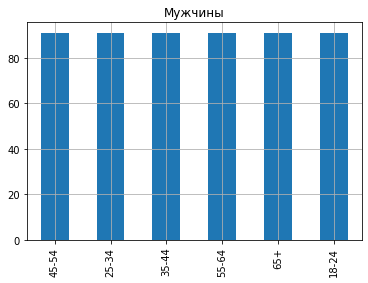

In [6]:
df[df['Gender'] == 'male']['Age'].value_counts().plot(kind = 'bar', grid= True, title='Мужчины')

<AxesSubplot:title={'center':'Женщины'}>

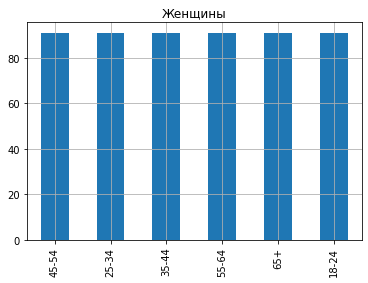

In [7]:
df[df['Gender'] == 'female']['Age'].value_counts().plot(kind = 'bar', grid= True, title='Женщины')

**Равное распределение, люди готовы менять род деятельности в любом возрате**

3. Рассмотрим распределение Goals в среднем по полу

<AxesSubplot:title={'center':'Распределение Goals в среднем по полу'}, xlabel='Gender'>

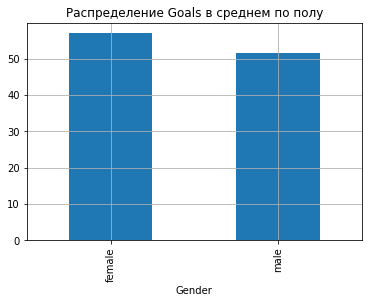

In [8]:
df.groupby(by = ['Gender'])['Goals'].mean().plot(kind = 'bar', grid= True, title='Распределение Goals в среднем по полу')

**Женщины в среднем создают резюме немного чаще**

4. Рассмотри распределение Goals, построим boxplot

<AxesSubplot:xlabel='Gender', ylabel='Goals'>

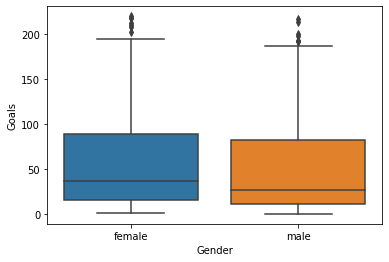

In [9]:
import seaborn as sns
sns.boxplot(x = 'Gender', y = 'Goals', data = df)

In [10]:
df['Goals'].median()

32.0

**Данные ассиметричны**

5. Рассмотрим, сколько в среднем созадются резюме по группировке пол/возраст

<AxesSubplot:title={'center':'Резюме в среднем по группировке пол/возраст'}, xlabel='Age'>

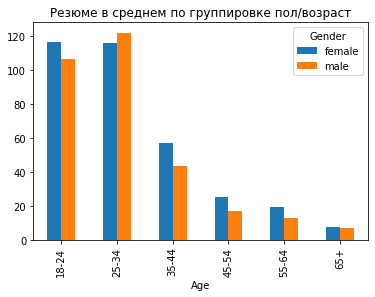

In [11]:
df.groupby(['Age','Gender'])['Goals'].aggregate('mean').unstack().plot(kind = 'bar', title='Резюме в среднем по группировке пол/возраст')

**Чаще всего ищут работу в новой сфере в возрасте от 18 до 34**
<br>
**Люди старше 34 все меньше готовы менять род своей деятельности**
<br>
**Мужчины чуть менее заинтересованы в смене рода деятельности**